In [1]:
# Importar bibliotecas
import pandas as pd # manejo de datos
import numpy as np # manejo numérico
import matplotlib.pyplot as plt # graficos
import seaborn as sns # graficos
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression # Regresión Lineal
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Importar métricas de rendimientos
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import math as m
import scipy.stats as stats

# Importar módulo para ignorar errores
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('ingresos.txt', sep='\t') 

In [3]:
data.head(3)

,estatura,peso,genero,ingresos,etnia,educacion,educacion_madre,educacion_padre,camina,ejercicio,fumador,tenso,malhumorado,edad
0,187.96,95.25,masculino,50000.0,Blanco,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,167.64,56.70,femenino,60000.0,Blanco,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,162.56,57.15,femenino,30000.0,Blanco,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
estatura,1816.0,169.084835,9.732829,144.78,162.56,167.64,175.895,208.28
peso,1789.0,70.898418,15.701936,36.29,58.97,68.04,81.650,155.13
ingresos,1816.0,21147.296256,22531.765123,0.00,6000.00,16000.00,27000.000,400000.00
educacion,1814.0,13.235391,2.556638,2.00,12.00,12.00,15.000,18.00
educacion_madre,1572.0,13.608779,3.219372,3.00,12.00,13.00,16.000,99.00
educacion_padre,1521.0,13.652202,3.250811,3.00,12.00,13.00,16.000,99.00
camina,1816.0,5.303414,2.601104,1.00,3.00,6.00,8.000,8.00
ejercicio,1816.0,3.049009,2.316385,1.00,1.00,2.00,5.000,7.00
fumador,1815.0,1.745455,0.435725,1.00,1.00,2.00,2.000,2.00
tenso,1815.0,1.421488,2.157850,0.00,0.00,0.00,2.000,7.00


In [5]:
print(data.dtypes)

estatura           float64
peso               float64
genero              object
ingresos           float64
etnia               object
educacion          float64
educacion_madre    float64
educacion_padre    float64
camina               int64
ejercicio            int64
fumador            float64
tenso              float64
malhumorado        float64
edad                 int64
dtype: object


In [6]:
nan = data.isna().sum()
print(nan)

estatura             0
peso                27
genero               0
ingresos             0
etnia                0
educacion            2
educacion_madre    244
educacion_padre    295
camina               0
ejercicio            0
fumador              1
tenso                1
malhumorado          1
edad                 0
dtype: int64


In [7]:
#Variables categoricas a dummies
col_for_dummies = data.select_dtypes(object).columns
data = pd.get_dummies(data, col_for_dummies, dtype=int, drop_first=True)

In [8]:
# Escalar las características
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [9]:
# Copiar el DataFrame original para mantener los datos originales
data_original = data.copy(deep=True)

# Inicializar el imputador KNN
KNN_imputer = KNNImputer(n_neighbors=5)

# Imputar usando fit_transform en data_imputer
data_scaled_imputer_knn = KNN_imputer.fit_transform(data_scaled)

# Volver a la escala original con los datos imputados que conseguimos anteriormente
original_data = scaler.inverse_transform(data_scaled_imputer_knn)

# Convertir a DataFrame
original_data = pd.DataFrame(original_data, columns=data.columns)

# Seleccionar columnas numéricas
col_num = data.drop(columns = ['estatura','peso','ingresos']).columns

# Redondear valores enteros
original_data[col_num] = original_data[col_num].astype(int)

original_data.head()

,estatura,peso,ingresos,educacion,educacion_madre,educacion_padre,camina,ejercicio,fumador,tenso,malhumorado,edad,genero_masculino,etnia_Blanco,etnia_Latino,etnia_Other
0,187.96,95.25,50000.0,16,16,16,3,3,2,0,0,45,1,1,0,0
1,167.64,56.70,60000.0,16,16,16,6,5,1,0,0,58,0,1,0,0
2,162.56,57.15,30000.0,16,16,16,8,1,2,1,1,29,0,1,0,0
3,165.10,90.72,25000.0,17,17,16,8,1,2,0,0,57,0,1,0,0
4,160.02,49.90,50000.0,16,16,16,5,6,2,0,0,91,0,0,0,1


In [10]:
nan2 = original_data.isna().sum()
print(nan2)

estatura            0
peso                0
ingresos            0
educacion           0
educacion_madre     0
educacion_padre     0
camina              0
ejercicio           0
fumador             0
tenso               0
malhumorado         0
edad                0
genero_masculino    0
etnia_Blanco        0
etnia_Latino        0
etnia_Other         0
dtype: int64


In [11]:
#Regresion Lasso seleccion de variables
from sklearn.model_selection import train_test_split # Separar el set de datos
from sklearn.linear_model import LinearRegression # Regresión Lineal
y = original_data['ingresos']
X = original_data.drop(columns = 'ingresos')

# Particionar data
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.8, random_state=0)

In [12]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold

# particiones
particiones = KFold(n_splits = 10, shuffle = True, random_state = 0)

# Definir el rango de valores de alpha
param_grid = {'alpha': [0.1, 0.5, 1, 5, 10]}

# Crear el modelo de regresión Ridge
lasso = Lasso()

# Configurar la búsqueda de cuadrícula
# minimizar el error cuadrático medio durante la búsqueda de cuadrícula.
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=particiones, scoring='neg_mean_squared_error')

# Realizar la búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de alpha
best_alpha = grid_search.best_params_['alpha']

print("El mejor valor de alpha es:", best_alpha)

El mejor valor de alpha es: 10


In [13]:
#Variables de importancia
modelo_final = grid_search.best_estimator_
print(f'Mejor penalización: {modelo_final}')
coeficientes = [float(format(i, '.2f')) for i in modelo_final.coef_]

variables = X.columns
df_sel_var = pd.DataFrame({'variables': variables, 'coeficientes': coeficientes})

col_excluir = list(df_sel_var[df_sel_var['coeficientes'] == 0]['variables'])

col_incluir = list(df_sel_var[df_sel_var['coeficientes'] != 0]['variables'])

Mejor penalización: Lasso(alpha=10)


In [14]:
df_sel_var[df_sel_var['coeficientes']==0]

,variables,coeficientes
9,malhumorado,0.0


In [15]:
#Modelo de regresion lineal
X = original_data[col_incluir].copy()
y = original_data['ingresos']

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Importar métricas de rendimientos

def fn_metricas_info(modelo, y_verdadero, y_calculado):
    metrics = {
        'MAE': mean_absolute_error(y_verdadero, y_calculado),
        'MSE': mean_squared_error(y_verdadero, y_calculado),
        'RMSE': np.sqrt(mean_squared_error(y_verdadero, y_calculado)),
        'R2': r2_score(y_verdadero, y_calculado)
    }
    return pd.DataFrame(metrics, index=[modelo])

In [17]:
# Separar datos
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.8, random_state=0)

# Crear el modelo de regresión
lineal_model = LinearRegression()

# Entrenar el modelo
lineal_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = lineal_model.predict(X_test)

# Evaluar el modelo
df_metricas = pd.DataFrame()
df_metricas = fn_metricas_info('Regresión Lineal', y_test, y_pred)
df_metricas

,MAE,MSE,RMSE,R2
Regresión Lineal,12884.547538,3.676784e+08,19174.941189,0.188313


In [18]:
#Modelo polinomial
from sklearn.preprocessing import PolynomialFeatures

# Instaciar modelo de regresión polinomial
poli = PolynomialFeatures(degree = 2)


# Ft transformar a set de caracterìsticas
X_train_poli = poli.fit_transform(X_train)
X_test_poli = poli.fit_transform(X_test)

#@title Instanciar objeto de regresión lineal y aplicar modelo a set de entrenamiento
mod_reg_poli = LinearRegression()

# Entrenar set de prueba
mod_reg_poli.fit(X_train_poli, y_train)

y_test_pred = mod_reg_poli.predict(X_test_poli)

# Metrica
df_metricas = pd.concat([df_metricas, fn_metricas_info('Regresión Polinomial G2',y_test, y_test_pred)])
df_metricas

,MAE,MSE,RMSE,R2
Regresión Lineal,12884.547538,3.676784e+08,19174.941189,0.188313
Regresión Polinomial G2,12563.331557,3.637640e+08,19072.598731,0.196954


In [19]:
#Modelo Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold

# particiones
particiones = KFold(n_splits = 10, shuffle = True, random_state = 0)

# Definir el rango de valores de alpha
param_grid = {'alpha': [0.1, 1, 3, 5, 10]}

# Crear el modelo de regresión Ridge
ridge = Ridge()

# Configurar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=particiones, scoring='neg_mean_squared_error')

# Realizar la búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de alpha
best_alpha = grid_search.best_params_['alpha']

print("El mejor valor de alpha es:", best_alpha)

ridge = Ridge(alpha= best_alpha, random_state=42)

El mejor valor de alpha es: 10


In [20]:
ridge.fit(X_train, y_train)

# Obtner predicción datos test
y_test_pred = ridge.predict(X_test)

# Metrica
df_metricas = pd.concat([df_metricas, fn_metricas_info('Regresión Ridge',y_test, y_test_pred)])
df_metricas

,MAE,MSE,RMSE,R2
Regresión Lineal,12884.547538,3.676784e+08,19174.941189,0.188313
Regresión Polinomial G2,12563.331557,3.637640e+08,19072.598731,0.196954
Regresión Ridge,12887.214740,3.675216e+08,19170.853498,0.188659


In [21]:
#Modelo Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold

# particiones
particiones = KFold(n_splits = 10, shuffle = True, random_state = 0)

# Definir el rango de valores de alpha
param_grid = {'alpha': [0.1, 1, 3, 5, 10]}

# Crear el modelo de regresión Ridge
lasso = Lasso()

# Configurar la búsqueda de cuadrícula
# minimizar el error cuadrático medio durante la búsqueda de cuadrícula.
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=particiones, scoring='neg_mean_squared_error')

# Realizar la búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de alpha
best_alpha = grid_search.best_params_['alpha']

print("El mejor valor de alpha es:", best_alpha)

#Instanciar el modelo Lasso y aplicar a nuestro set de entrenamiento y test
lasso = Lasso(alpha=best_alpha,random_state=42)

El mejor valor de alpha es: 10


In [22]:
# Entrenar modelo datos train
lasso.fit(X_train, y_train)

y_test_pred = lasso.predict(X_test)

# Metrica
df_metricas = pd.concat([df_metricas, fn_metricas_info('Regresión Lasso',y_test, y_test_pred)])
df_metricas

,MAE,MSE,RMSE,R2
Regresión Lineal,12884.547538,3.676784e+08,19174.941189,0.188313
Regresión Polinomial G2,12563.331557,3.637640e+08,19072.598731,0.196954
Regresión Ridge,12887.214740,3.675216e+08,19170.853498,0.188659
Regresión Lasso,12875.051678,3.673782e+08,19167.111446,0.188976


In [23]:
#Elastic Net
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Definir el rango de valores de alpha
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Crear el modelo de regresión Ridge
elastic_net = ElasticNet()

# particiones
particiones = KFold(n_splits = 10, shuffle = True, random_state = 0)

# Configurar la búsqueda de cuadrícula
# minimizar el error cuadrático medio durante la búsqueda de cuadrícula.
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=particiones, scoring='neg_mean_squared_error')

# Realizar la búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de alpha
best_alpha = grid_search.best_params_['alpha']

print("El mejor valor de alpha es:", best_alpha)

elastic_net = ElasticNet(alpha=best_alpha,
                         random_state=42)

El mejor valor de alpha es: 0.1


In [24]:
elastic_net.fit(X_train, y_train)
y_test_pred = elastic_net.predict(X_test)

# Metrica
df_metricas = pd.concat([df_metricas, fn_metricas_info('Regresión Elastic Net',y_test, y_test_pred)])
df_metricas

,MAE,MSE,RMSE,R2
Regresión Lineal,12884.547538,3.676784e+08,19174.941189,0.188313
Regresión Polinomial G2,12563.331557,3.637640e+08,19072.598731,0.196954
Regresión Ridge,12887.214740,3.675216e+08,19170.853498,0.188659
Regresión Lasso,12875.051678,3.673782e+08,19167.111446,0.188976
Regresión Elastic Net,12927.332372,3.684739e+08,19195.673847,0.186557


In [25]:
df_metricas[df_metricas['RMSE'] == df_metricas['RMSE'].min()]

,MAE,MSE,RMSE,R2
Regresión Polinomial G2,12563.331557,3.637640e+08,19072.598731,0.196954


In [26]:
#Analisis de componenetes principales
scaler = StandardScaler()
data_scaled = scaler.fit_transform(original_data) 

In [27]:
#Verificacion de correcta estandarizacion:
mean_values = np.mean(data_scaled, axis=0).round(2)  # media por columna
var_values = np.var(data_scaled, axis=0).round(2)    # varianza por columna

print("Medias de cada columna:", mean_values)
print("Varianza de cada columna:", var_values)

Medias de cada columna: [ 0.  0.  0. -0. -0. -0.  0. -0. -0.  0.  0.  0.  0. -0.  0.  0.]
Varianza de cada columna: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**PCA**

In [28]:
data_scaled_df = pd.DataFrame(data_scaled, columns=original_data.columns)

**Correlacion de Pearson**

In [29]:
# Calcular la matriz de correlación de Pearson
matriz_corr = data_scaled_df.corr(method="pearson")

**Prueba esferidad de Bartlet**

In [30]:
# se procede a calcular los valores para el estadistico chi-cuadro
n = len(data_scaled)
p = data_scaled.shape[1]
R = np.linalg.det(matriz_corr)

print(f'Cantidad de filas {n}')
print(f'Cantidad de columnas {p}')
print(f'Determinante de la matriz de correlación {R}')

Cantidad de filas 1816
Cantidad de columnas 16
Determinante de la matriz de correlación 7.258602135080849e-38


In [31]:
# Valor estadistico chi2
chi2 = -(n-1-((2*p+5)/6))*m.log(R)
print(f'Valor estadistico chi2: {chi2}')

Valor estadistico chi2: 154684.2750223596


In [32]:
gdl = (p*(p-1))/2
print(f'Grados de libertad: {gdl}')

Grados de libertad: 120.0


In [33]:
pvalue = stats.chi2.pdf(chi2, gdl)
print(f'P-value: {pvalue}')

P-value: 0.0


El resultado muestra que p < 0,05, es decir que tenemos evidencias para rechazar la hipótesis nula, por lo tanto podemos decir que variables están correlacionadas. En otras palabras podemos llevar a cabo un proceso de reducción de dimensionalidad

**Indice KMO de Kaiser-Meyer-Olkin**

In [34]:
# A.Obtener matriz de covarianza
matriz_cov = np.cov(data_scaled.T)

In [35]:
# B.Computar los autovalores y autovectores (la salida es de esa forma, primero los autovalores y luego los autovectores)
autovalores, autovector = np.linalg.eig(matriz_corr)
autovalores

array([ 3.07682362e+00,  2.32165498e+00,  1.97401989e+00,  1.63461215e+00,
        1.22647007e+00,  1.06545957e+00,  1.01800759e+00,  9.27977592e-01,
        8.03305363e-01,  5.50241495e-01,  4.50982973e-01,  2.62220758e-01,
        3.20853900e-01,  3.60084377e-01,  7.28567506e-03, -6.54978886e-17])

In [36]:
autovalores.sum()

np.float64(16.000000000000014)

In [37]:
pct_varianza_explicada = autovalores/sum(autovalores)
pct_varianza_explicada

array([ 1.92301476e-01,  1.45103436e-01,  1.23376243e-01,  1.02163259e-01,
        7.66543795e-02,  6.65912231e-02,  6.36254744e-02,  5.79985995e-02,
        5.02065852e-02,  3.43900935e-02,  2.81864358e-02,  1.63887974e-02,
        2.00533688e-02,  2.25052736e-02,  4.55354691e-04, -4.09361804e-18])

In [38]:
df_pct_varianza_explicada = pd.DataFrame(sorted(pct_varianza_explicada, reverse = True), index = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']).T

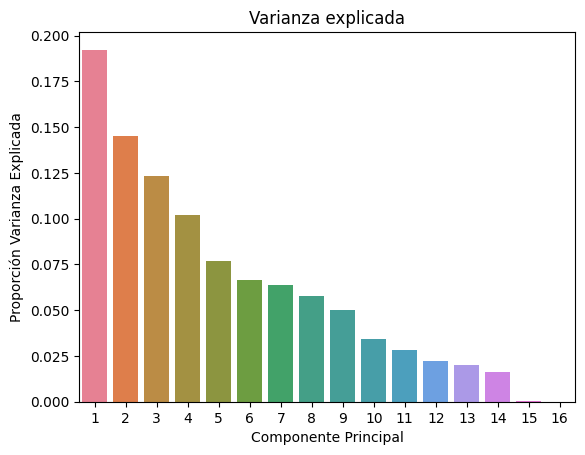

In [39]:
#Graficar varianza explicada
sns.barplot(df_pct_varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Proporción Varianza Explicada')
plt.title('Varianza explicada')
plt.show()

In [40]:
autovalores_kaiser = autovalores[autovalores >= 0.8]
autovalores_kaiser

array([3.07682362, 2.32165498, 1.97401989, 1.63461215, 1.22647007,
       1.06545957, 1.01800759, 0.92797759, 0.80330536])

Bajo este criterio debemos trabajar con 9 componentes

In [41]:
varianza_explicada=[]
varianza_explicada_acum =[]

# Loop para capturar la varianza explicada y la varianza explicada acumulada
for i in autovalores_kaiser:
    varianza_explicada.append((i)/sum(autovalores)*100)
    varianza_explicada_acum.append(sum(varianza_explicada))


# Generar DataFrame
matriz_var_expl = pd.DataFrame({'pct_var_expl': varianza_explicada,
                                'pct_var_expl_acum': varianza_explicada_acum
                               },
                               index=np.linspace(1,len(autovalores_kaiser),len(autovalores_kaiser)))


# Visualizar matriz
matriz_var_expl

,pct_var_expl,pct_var_expl_acum
1.0,19.230148,19.230148
2.0,14.510344,33.740491
3.0,12.337624,46.078116
4.0,10.216326,56.294441
5.0,7.665438,63.959879
6.0,6.659122,70.619002
7.0,6.362547,76.981549
8.0,5.799860,82.781409
9.0,5.020659,87.802068


Estas 9 variables explican el 87,8% de la varianza total de la data original.

Supuestos:

Linealidad: Se asume que las relaciones entre las variables son lineales.

Normalidad: Aunque no es estrictamente necesario, es ideal que las variables sigan distribuciones normales para una interpretación más precisa.

Escalado: Las variables deben estar estandarizadas (media 0, desviación estándar 1) para evitar que las variables con mayor magnitud dominen los resultados.

Independencia: Las componentes principales resultantes deben ser no correlacionadas entre sí (ortogonales).